In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
image_path = '/content/comp.jpg'
image = cv2.imread(image_path)

In [6]:
if image is None:
    print("Error: Unable to load the image.")
    exit()

In [15]:
new_width, new_height = 500, 500

In [16]:
resized_linear = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

# 1.1.2 Nearest Neighbors interpolation
resized_nearest = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_NEAREST)

# 1.1.3 Polynomial interpolation (using cubic as a close approximation)
resized_cubic = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)


In [17]:
box_blur = cv2.blur(image, (5, 5))  # Kernel size 5x5

# 1.2.2 Gaussian blurring
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)  # Kernel size 5x5, sigma=0

# 1.2.3 Adaptive blurring (using bilateral filter as an adaptive technique)
adaptive_blur = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

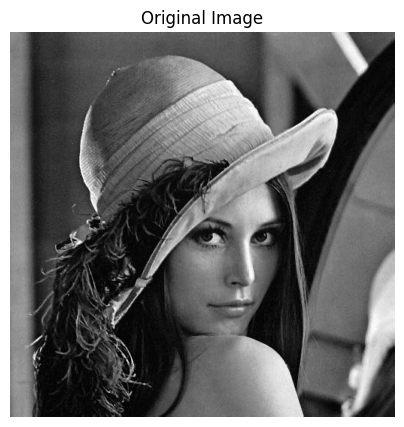

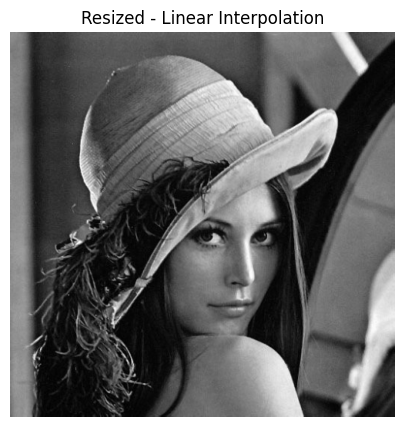

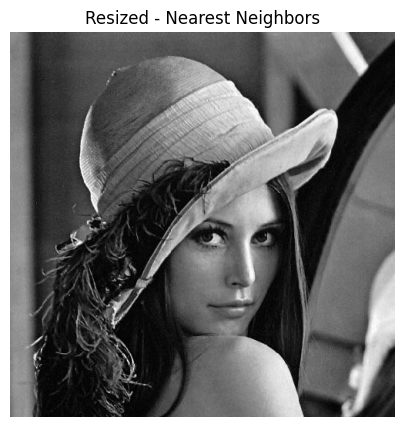

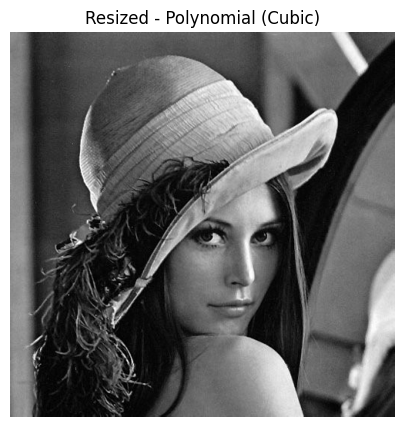

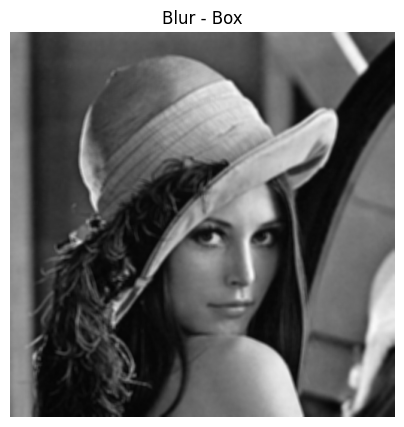

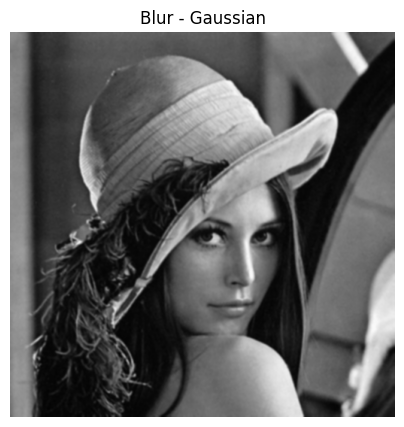

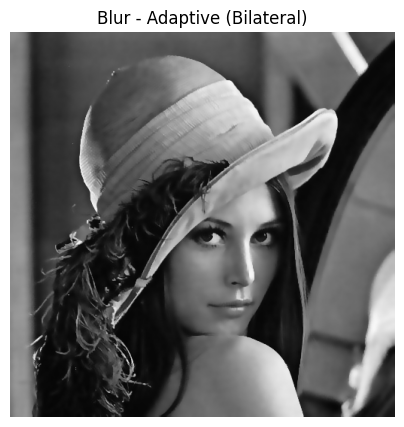

In [19]:
def display_image(img, title):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.figure(figsize=(5, 5))
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display all images
display_image(image, "Original Image")
display_image(resized_linear, "Resized - Linear Interpolation")
display_image(resized_nearest, "Resized - Nearest Neighbors")
display_image(resized_cubic, "Resized - Polynomial (Cubic)")
display_image(box_blur, "Blur - Box")
display_image(gaussian_blur, "Blur - Gaussian")
display_image(adaptive_blur, "Blur - Adaptive (Bilateral)")

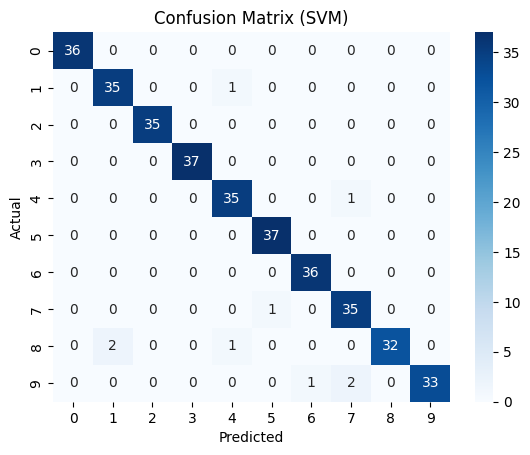

Model: Naive Bayes
Accuracy: 0.7416666666666667
Precision: 0.8115651949207483
Recall: 0.7416666666666667
F1-Score: 0.7418508070783839
Confusion Matrix: [[33  1  0  0  0  1  0  0  1  0]
 [ 0 30  1  0  0  0  3  0  2  0]
 [ 0  4 13  0  0  1  0  0 17  0]
 [ 0  0  1 19  0  1  0  1 14  1]
 [ 0  6  0  0 19  0  1  9  1  0]
 [ 0  1  0  0  0 34  0  1  0  1]
 [ 0  1  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  1  0 35  0  0]
 [ 0  7  1  0  0  0  0  1 26  0]
 [ 1  4  1  0  0  0  0  4  3 23]]


Model: SVM
Accuracy: 0.975
Precision: 0.9758870712818082
Recall: 0.975
F1-Score: 0.9749341232105315
Confusion Matrix: [[36  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  1  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  1  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  1  0 35  0  0]
 [ 0  2  0  0  1  0  0  0 32  0]
 [ 0  0  0  0  0  0  1  2  0 33]]


Model: Random Forest
Accuracy: 0.9611111111111111
Precision: 0.9

In [22]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

data = load_digits()
X, y = data.data, data.target


scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

classifiers = {
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True, kernel='rbf', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "ANN": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}


results = {}
for name, model in classifiers.items():
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
    }



sns.heatmap(results['SVM']["Confusion Matrix"], annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix (SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


for name, metrics in results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")
